In [126]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [127]:
with open(f'dataframes/{4}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.756671e+09,1.756671e+09,"[269.36, 142.25, 142.48, 142.4, 142.48, 142.79...",775,1,5
1,Tag2,Tag1,1.756671e+09,1.756671e+09,"[528.69, 16.59, 16.29, 16.29, 16.06, 16.14, 15...",775,1,5
2,Tag1,Tag2,1.756671e+09,1.756671e+09,"[143.09, 348.1, 347.26, 349.24, 348.4, 348.78,...",785,1,5
3,Tag2,Tag1,1.756671e+09,1.756671e+09,"[16.29, 25.75, 25.75, 26.05, 25.98, 25.75, 25....",785,1,5
4,Tag1,Tag2,1.756671e+09,1.756671e+09,"[348.4, 396.77, 397.15, 398.3, 397.92, 398.37,...",795,1,5


Bad data found at 19 df_idx at phase 3.
5 117.418 1.602253413165346


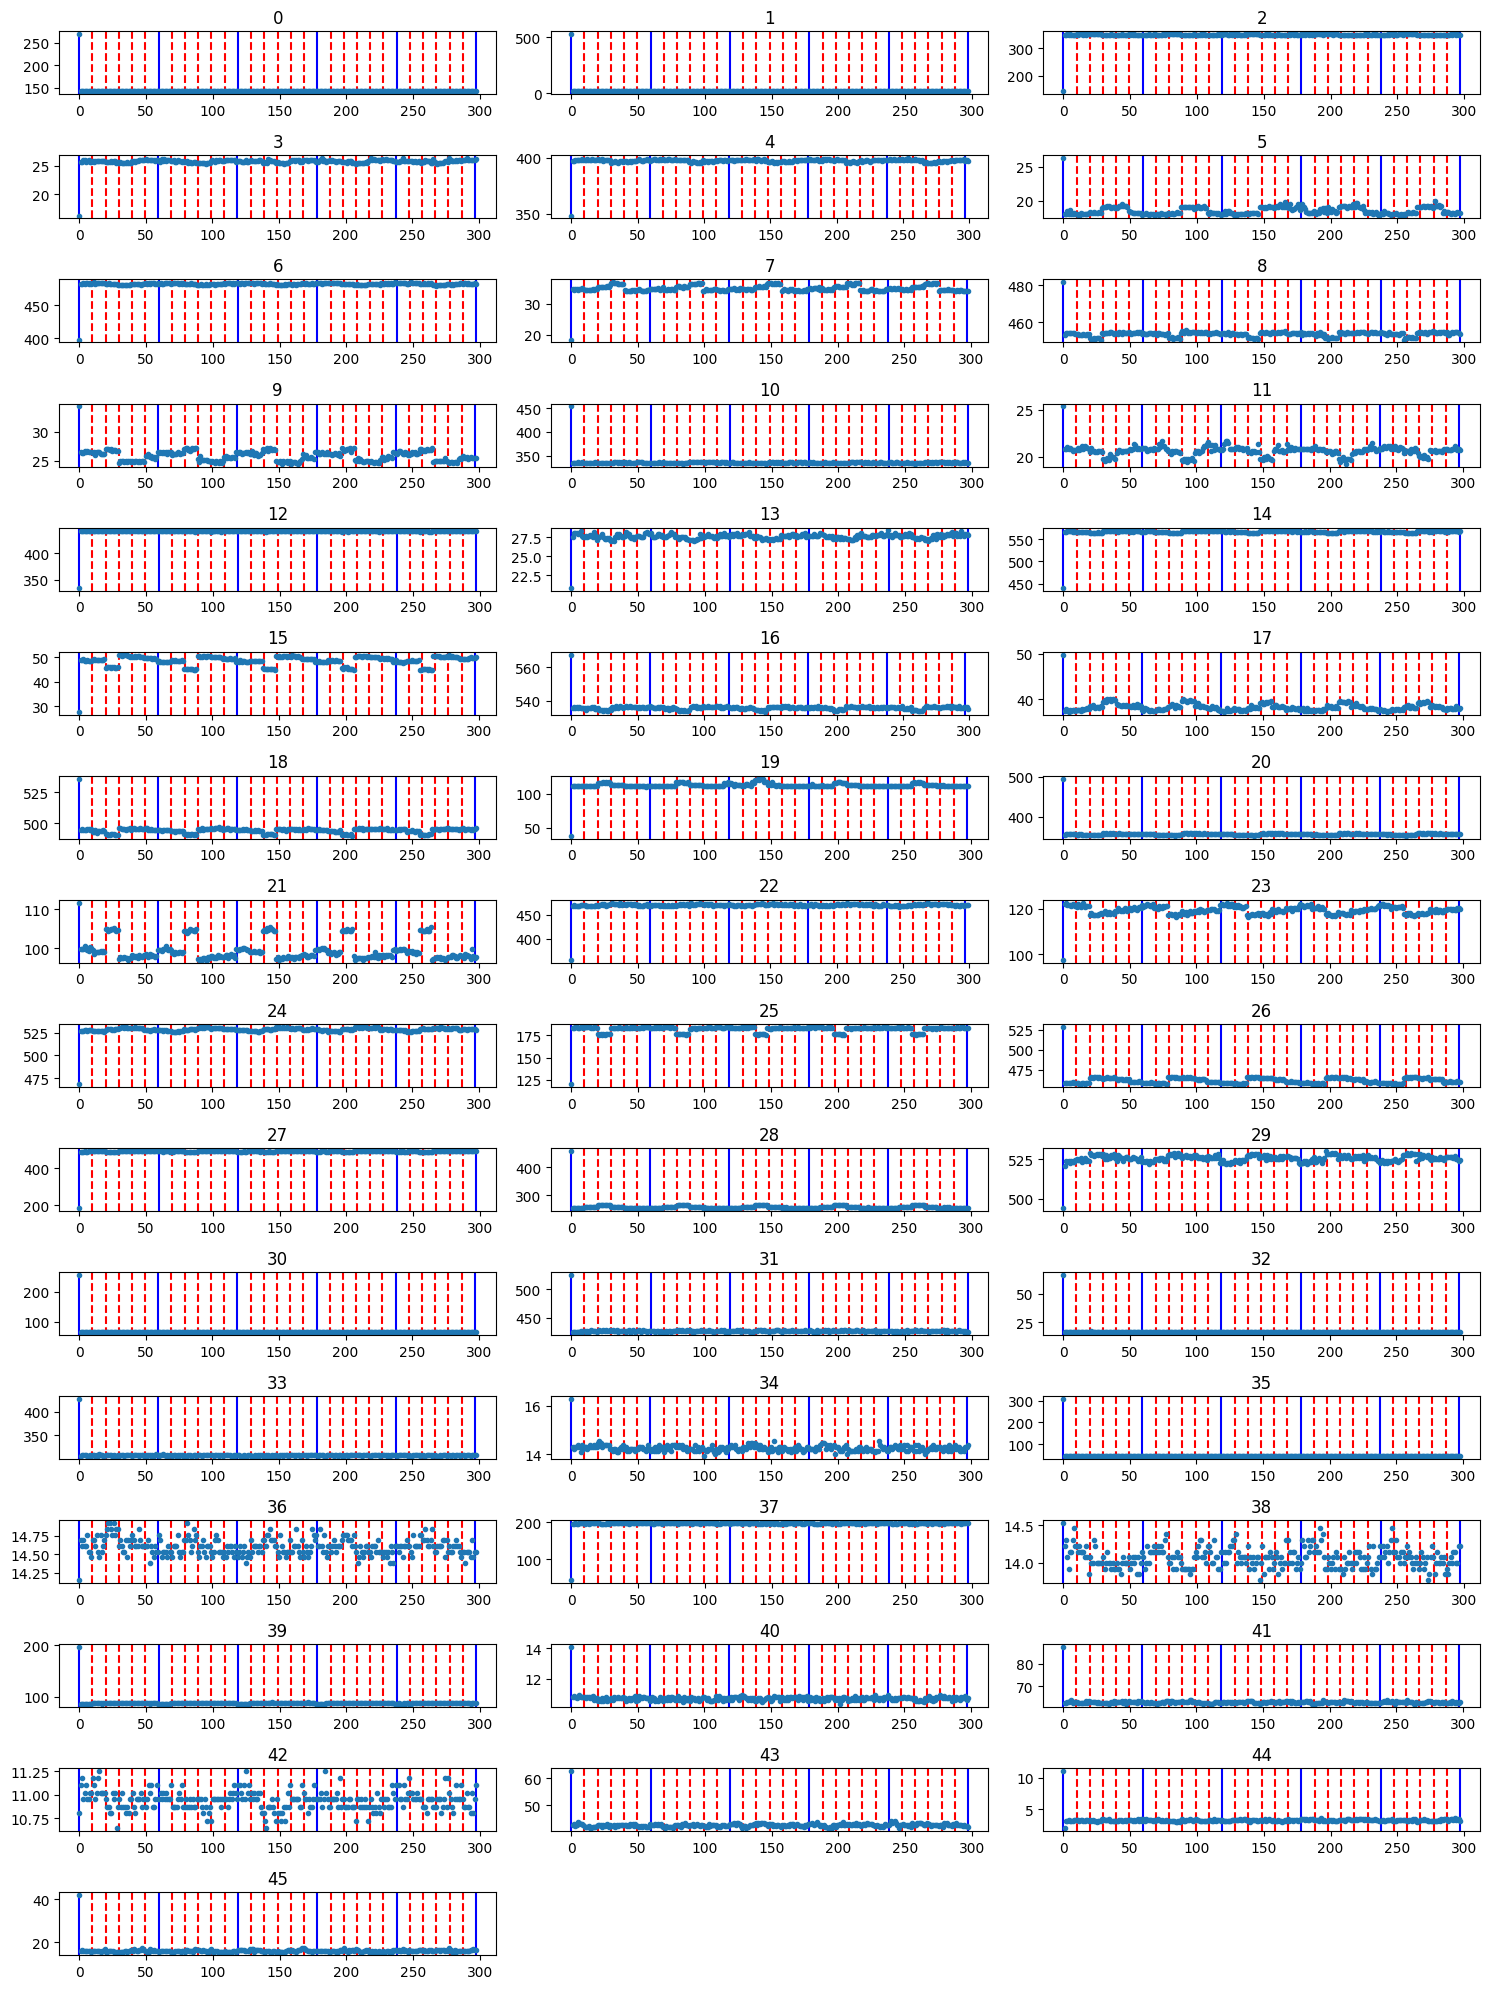

In [128]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df.iloc[0]['NumMPPs']
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(15,20))
for df_idx in range(len(df)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            print(f"Bad data found at {df_idx} df_idx at phase {k}.")
            print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.plot(voltages,'.')
        plt.title(df_idx)
        plt.tight_layout()
        
if plotting:
    plt.show()
    
    

In [ ]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[269.36, 142.25, 142.48, 142.4, 142.48, 142.79...","[142.56, 142.75, 142.595, 142.70999999999998, ...","[142.71, 142.825, 142.75, 142.70999999999998, ...","[143.015, 142.98000000000002, 143.09, 142.79, ...","[142.70999999999998, 142.365, 142.4, 142.44, 1...","[142.48, 142.56, 142.48000000000002, 142.56, 1...","[142.48, 142.63, 142.56, 142.56, 142.519999999...",775,1,5
1,Tag2,Tag1,"[528.69, 16.59, 16.29, 16.29, 16.06, 16.14, 15...","[16.14, 15.98, 16.02, 15.98, 16.1]","[15.98, 16.02, 16.14, 16.1, 15.98]","[16.06, 16.02, 15.870000000000001, 15.98, 15.91]","[15.91, 15.83, 15.83, 15.83, 15.98]","[16.06, 15.91, 16.1, 15.945, 16.02]","[16.14, 16.06, 16.1, 16.1, 16.14]",775,1,5
2,Tag1,Tag2,"[143.09, 348.1, 347.26, 349.24, 348.4, 348.78,...","[348.4, 348.365, 348.93499999999995, 348.82, 3...","[348.86, 348.63, 348.555, 349.04999999999995, ...","[349.275, 349.355, 349.125, 349.01, 349.43]","[348.48, 347.94500000000005, 348.33, 348.28999...","[348.44, 348.02, 348.175, 348.28999999999996, ...","[348.44, 348.405, 348.515, 348.48, 348.5900000...",785,1,5
3,Tag2,Tag1,"[16.29, 25.75, 25.75, 26.05, 25.98, 25.75, 25....","[25.75, 25.98, 25.75, 25.9, 25.83]","[25.83, 25.865, 25.865, 25.9, 25.83]","[25.75, 25.71, 25.79, 25.67, 25.79]","[25.560000000000002, 25.52, 25.52, 25.52, 25.5...","[25.9, 25.9, 25.939999999999998, 26.09, 25.939...","[26.015, 26.09, 25.98, 26.09, 26.05]",785,1,5
4,Tag1,Tag2,"[348.4, 396.77, 397.15, 398.3, 397.92, 398.37,...","[398.3, 398.26, 397.88, 397.995, 398.03]","[398.03499999999997, 398.225, 398.07, 398.3350...","[398.07000000000005, 397.92, 398.185, 398.07, ...","[396.58000000000004, 395.93499999999995, 395.9...","[396.85, 397.0, 396.43, 396.735, 396.775]","[397.95500000000004, 397.57500000000005, 397.7...",795,1,5
5,Tag2,Tag1,"[26.21, 17.97, 17.97, 18.5, 18.04, 18.58, 18.0...","[18.04, 17.97, 18.08, 18.310000000000002, 18.08]","[18.005, 17.97, 17.97, 18.425, 17.97]","[18.2, 18.12, 18.2, 18.43, 18.16]","[19.04, 19.11, 19.04, 19.15, 19.15]","[19.19, 18.96, 19.11, 19.04, 19.115000000000002]","[18.2, 18.16, 18.96, 18.2, 18.16]",795,1,5
6,Tag1,Tag2,"[398.22, 481.08, 481.69, 482.22, 481.99, 482.6...","[481.99, 482.72, 482.68, 482.72, 482.49]","[482.755, 482.53, 482.83500000000004, 482.72, ...","[481.84, 481.61, 481.91499999999996, 481.69, 4...","[480.16499999999996, 480.43, 480.43, 480.04999...","[481.345, 481.23, 481.16, 481.16, 481.38]","[482.26, 482.3, 482.11, 482.07, 482.11]",805,1,5
7,Tag2,Tag1,"[18.35, 34.83, 34.52, 34.75, 34.83, 34.6, 34.9...","[34.83, 34.79, 34.75, 34.94499999999999, 34.83]","[34.56, 34.6, 34.715, 34.64, 34.64]","[35.36, 35.44, 35.52, 35.44, 35.55500000000001]","[36.584999999999994, 36.51, 36.545, 36.62, 36....","[34.29, 34.45, 34.45, 34.33, 34.41]","[34.37, 34.485, 34.29, 34.254999999999995, 34.29]",805,1,5
8,Tag1,Tag2,"[481.69, 453.38, 453.99, 454.45, 454.07, 454.0...","[454.07, 453.91999999999996, 453.9550000000000...","[453.41999999999996, 453.84, 453.65, 453.53499...","[451.44, 451.4, 451.36, 451.48, 451.745]","[454.265, 454.72, 454.49, 454.185, 454.49]","[454.3, 454.3, 454.455, 454.49, 454.605]","[454.26, 454.26, 453.95500000000004, 454.33500...",815,1,5
9,Tag2,Tag1,"[34.29, 26.44, 26.36, 26.36, 26.67, 26.44, 26....","[26.51, 26.44, 26.4, 26.285, 26.32]","[26.36, 26.245, 26.17, 26.17, 26.285]","[26.855, 27.085, 26.97, 26.97, 26.82]","[24.95, 25.14, 24.76, 24.99, 24.99]","[24.91, 24.76, 24.83, 24.795, 24.795]","[25.675, 25.560000000000002, 25.56000000000000...",815,1,5
